In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

Filter and get only the data since 2000.

In [3]:
df = pd.read_csv("../data/billboard.csv", index_col = 0)

In [4]:
df = df[df.date >= "2000-01-01"]

In [93]:
#df.to_csv('charts_since2000.csv')

The song with highest weeks-on-board

In [94]:
df[df["weeks-on-board"]==df["weeks-on-board"].max()]

date  rank             song      artist  last-week  peak-rank  \
1719  2021-09-04    20  Blinding Lights  The Weeknd       21.0          1   

      weeks-on-board  
1719              90

Count values for distinct artist and songs respectively

In [95]:
df["artist"].value_counts()

Taylor Swift                                1060
Drake                                        787
Kenny Chesney                                723
Keith Urban                                  673
Rascal Flatts                                604
                                            ... 
Moneybagg Yo Featuring Polo G & Lil Durk       1
Eminem Featuring P!nk                          1
Lil Jon Featuring LMFAO                        1
Khalid With John Mayer                         1
Gucci Mane & Drake                             1
Name: artist, Length: 4238, dtype: int64

In [96]:
df[["song", "artist"]].value_counts()

song                        artist                                   
Blinding Lights             The Weeknd                                   90
Radioactive                 Imagine Dragons                              87
Sail                        AWOLNATION                                   79
I'm Yours                   Jason Mraz                                   76
Party Rock Anthem           LMFAO Featuring Lauren Bennett & GoonRock    68
                                                                         ..
Breathless                  Taylor Swift                                  1
Bridge Over Troubled Water  Glee Cast                                     1
That's On Me                Mac Miller                                    1
Bridge Over Troubled Water  Tessanne Chin                                 1
Lost In Paradise            Evanescence                                   1
Length: 9316, dtype: int64

In [97]:
df.describe()

rank      last-week      peak-rank  weeks-on-board
count  114900.000000  114900.000000  114900.000000   114900.000000
mean       50.500000      42.879521      38.931619       11.778033
std        28.866196      30.102179      28.892800        9.493426
min         1.000000       0.000000       1.000000        1.000000
25%        25.750000      16.000000      12.000000        5.000000
50%        50.500000      41.000000      36.000000       10.000000
75%        75.250000      69.000000      63.000000       17.000000
max       100.000000     100.000000     100.000000       90.000000

Drop duplicatse for repeated song and then visualise the peak-rank and weeks-on-board columns

In [98]:
df_no_dup = df.drop_duplicates(['song','artist']).drop(['rank', 'last-week'],axis = 1)

In [99]:
df_no_dup.head()

date                               song        artist  peak-rank  \
0  2022-01-01    All I Want For Christmas Is You  Mariah Carey          1   
1  2022-01-01  Rockin' Around The Christmas Tree    Brenda Lee          2   
2  2022-01-01                   Jingle Bell Rock   Bobby Helms          3   
3  2022-01-01            A Holly Jolly Christmas     Burl Ives          4   
4  2022-01-01                         Easy On Me         Adele          1   

   weeks-on-board  
0              50  
1              44  
2              41  
3              25  
4              11

This Week Rank vs Last Week Rank

Text(0.5, 1.0, 'Last-week Rank vs. This-week Rank')

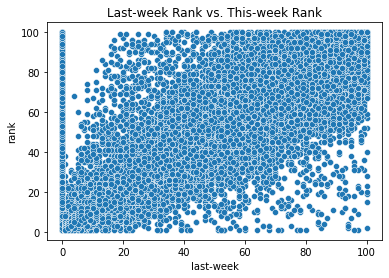

In [100]:
sns.scatterplot(x = 'last-week', y = "rank", data= df)
plt.title("Last-week Rank vs. This-week Rank")

Text(0.5, 1.08, 'Peak Rank vs Weeks on Board')

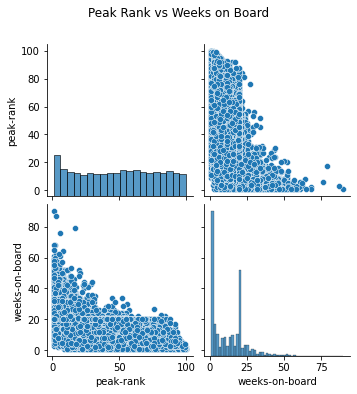

In [101]:
g = sns.pairplot(df_no_dup)
g.fig.suptitle("Peak Rank vs Weeks on Board", y=1.08)

## Get top artists and songs

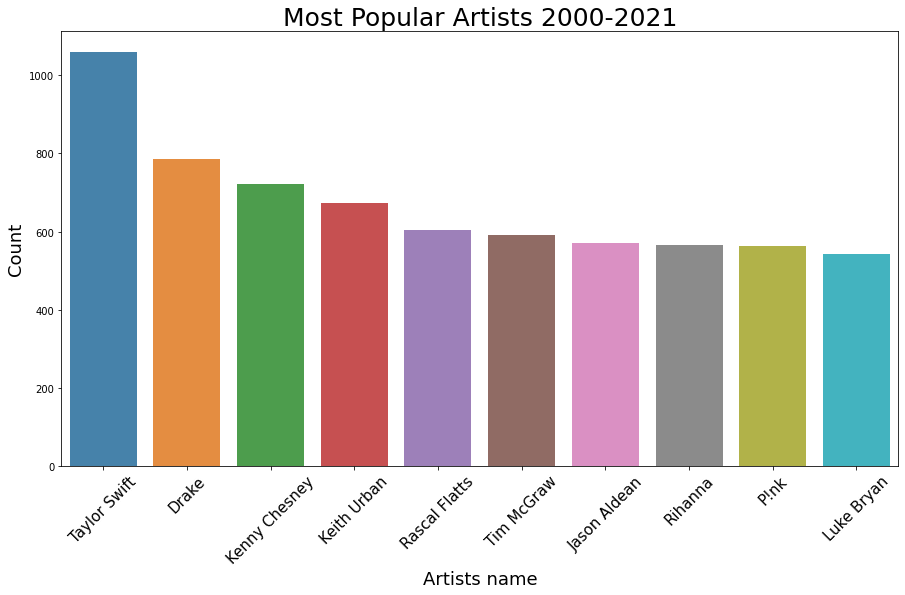

In [13]:
df_artist = df['artist'].value_counts().head(10)
df_artist = df_artist[:10,] # for the first ten artists
plt.figure(figsize=(15,8)) # figsize: inch by inch
sns.barplot(x = df_artist.index, y = df_artist.values, alpha=0.9)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Artists name', fontsize=18)
plt.title('Most Popular Artists 2000-2021', fontsize=25)
plt.xticks(rotation=45, fontsize=15)
plt.show()

date  rank             song      artist  last-week  peak-rank  \
1719   2021-09-04    20  Blinding Lights  The Weeknd       21.0          1   
1820   2021-08-28    21  Blinding Lights  The Weeknd       18.0          1   
1917   2021-08-21    18  Blinding Lights  The Weeknd       16.0          1   
2015   2021-08-14    16  Blinding Lights  The Weeknd       17.0          1   
2116   2021-08-07    17  Blinding Lights  The Weeknd       17.0          1   
...           ...   ...              ...         ...        ...        ...   
87698  2005-03-19    99       You And Me   Lifehouse        0.0         28   
87866  2005-03-05    67       You And Me   Lifehouse       45.0         28   
87944  2005-02-26    45       You And Me   Lifehouse       28.0         28   
88027  2005-02-19    28       You And Me   Lifehouse       92.0         28   
88191  2005-02-12    92       You And Me   Lifehouse        0.0         92   

       weeks-on-board  
1719               90  
1820               89  
1917               88  
2015               87  
2116               86  
...               ...  
87698               5  
87866               4  
87944               3  
88027               2  
88191               1  

[730 rows x 7 columns]

In [107]:
# how most popular artist among all time's rank changed over year
df_top_artist = df[df.artist.isin(df_artist.index)]

In [159]:
# df_top_songs = df[df.song.isin(df_song.index.get_level_values("song"))]
# df_top_songs['year'] = df_top_songs.date.apply(lambda x: int(x[:4]))
# js_song = df_top_songs.groupby(['year', 'song']).count().reset_index().groupby('year').head(10)[['year','song','rank']].reset_index(drop=True)
# js_song = js_song.sort_values(['song', 'year'])

# js_song = js_song.rename(columns = {"rank":"times on Board"})
# js_song
# out_js_df_song = []
# for name in df.song.isin(df_song.index.get_level_values("song")):
#     print(name)
#     temp_song = js_song[js_song.song == name]
#     print(temp_artist)
#     data = []
#     for year in range(2000, 2023):
#         if year not in temp_song.year.values:
#             data.append(None)
#         else:
#             data.append(temp_song[temp_song.year == year].song.values[0])
#             print("heii", temp_artist[temp_artist.year == year].song)
#     break

In [160]:
# out_js_df_song

In [109]:
# df_artist.to_json("df_artist.json")
df_top_artist["year"] = df_top_artist.date.apply(lambda x: int(x[:4]))
js1 = df_top_artist.groupby(['year', 'artist']).count().reset_index().groupby('year').head(10)[['year','artist','song']].reset_index(drop=True)

/var/folders/j0/455vlmts6yl8rk8fz6ztpr480000gn/T/ipykernel_31401/2469429244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_artist["year"] = df_top_artist.date.apply(lambda x: int(x[:4]))


In [115]:
js2 = js1.sort_values(['artist', 'year'])
js2

year      artist  song
56   2009       Drake    24
66   2010       Drake    42
76   2011       Drake    39
86   2012       Drake     6
96   2013       Drake    40
..    ...         ...   ...
113  2014  Tim McGraw    15
121  2015  Tim McGraw    18
131  2016  Tim McGraw    33
141  2017  Tim McGraw     3
162  2020  Tim McGraw    12

[172 rows x 3 columns]

In [136]:
# js1 = js1.rename(columns = {"song":"Songs on Board"})
out_js_df_artist = []
for name in df_artist.index:
    # print(name)
    temp_artist = js2[js2.artist == name]
    # print(temp_artist)
    data = []
    for year in range(2000, 2023):
        if year not in temp_artist.year.values:
            data.append(None)
        else:
            data.append(temp_artist[temp_artist.year == year].song.values[0])
            # print("heii", temp_artist[temp_artist.year == year].song)

    # print(data)
    # print()
    out_js_df_artist.append({"name": name, "data": data})
    # json.dump({"name": name, "data": data}, "temp.json")
    # break
    

Taylor Swift
     year        artist  song
36   2006  Taylor Swift    15
45   2007  Taylor Swift    45
54   2008  Taylor Swift   117
64   2009  Taylor Swift   122
74   2010  Taylor Swift    92
84   2011  Taylor Swift    75
94   2012  Taylor Swift    77
104  2013  Taylor Swift    80
112  2014  Taylor Swift    31
120  2015  Taylor Swift   110
130  2016  Taylor Swift    26
140  2017  Taylor Swift    38
148  2018  Taylor Swift    41
155  2019  Taylor Swift    60
161  2020  Taylor Swift    62
169  2021  Taylor Swift    66
171  2022  Taylor Swift     3
[None, None, None, None, None, None, 15, 45, 117, 122, 92, 75, 77, 80, 31, 110, 26, 38, 41, 60, 62, 66, 3]
Drake
     year artist  song
56   2009  Drake    24
66   2010  Drake    42
76   2011  Drake    39
86   2012  Drake     6
96   2013  Drake    40
106  2014  Drake    42
114  2015  Drake   124
122  2016  Drake   134
132  2017  Drake    78
142  2018  Drake   168
149  2019  Drake    10
156  2020  Drake    28
163  2021  Drake    52
[None, None,

In [139]:
# pd.DataFrame(out_js_df_artist).to_json("test.json")

In [142]:
# pd.Series(out_js_df_artist).to_json('test.json')

In [145]:

out_js_df_artist

[{'name': 'Taylor Swift',
  'data': [None,
   None,
   None,
   None,
   None,
   None,
   15,
   45,
   117,
   122,
   92,
   75,
   77,
   80,
   31,
   110,
   26,
   38,
   41,
   60,
   62,
   66,
   3]},
 {'name': 'Drake',
  'data': [None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   24,
   42,
   39,
   6,
   40,
   42,
   124,
   134,
   78,
   168,
   10,
   28,
   52,
   None]},
 {'name': 'Kenny Chesney',
  'data': [34,
   29,
   45,
   58,
   43,
   49,
   57,
   56,
   22,
   20,
   37,
   33,
   43,
   28,
   27,
   24,
   14,
   15,
   21,
   20,
   21,
   26,
   1]},
 {'name': 'Keith Urban',
  'data': [18,
   38,
   20,
   39,
   44,
   54,
   38,
   45,
   30,
   55,
   42,
   47,
   34,
   20,
   34,
   24,
   43,
   8,
   5,
   15,
   20,
   None,
   None]},
 {'name': 'Rascal Flatts',
  'data': [22,
   24,
   32,
   46,
   36,
   52,
   100,
   58,
   40,
   44,
   35,
   22,
   38,
   7,
   20,
   None,
   16,
   10,
   None,
   None,
 

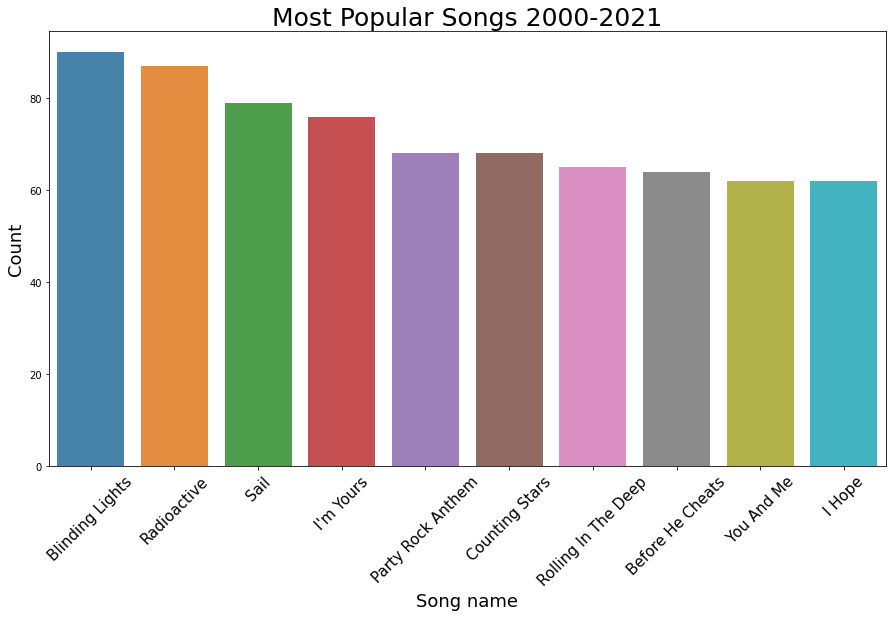

In [146]:
df_song = df[['song','artist']].value_counts().head(10)
df_song = df_song[:10,] # for the first ten artists
index = pd.Series(list(df_song.index)).apply(lambda x: x[0])
# index[4] = 'Party Rock Anthem - LMFAO, Lauren Bennett & GoonRock'
plt.figure(figsize=(15,8)) # figsize: inch by inch
sns.barplot(x = index, y = df_song.values, alpha=0.9)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Song name', fontsize=18)
plt.title('Most Popular Songs 2000-2021', fontsize=25)
plt.xticks(rotation=45, fontsize=15)
plt.show()

WordCloud

In [5]:
song_names = " ".join(list(df.song.values))

In [6]:
song_names = song_names.replace("'", " ").replace('/', " ")

In [7]:
final_to_write = ""
num = len(song_names)//1000
i = 0
while i < 1000:
    to_write = "'" + song_names[i*num: (i+1)*num] + "',\n\n" 
    i += 1
    final_to_write += to_write


In [9]:
len(final_to_write)

1636000

In [10]:
with open('words_for_wordcloud.txt', mode = 'w') as f:
    f.write(final_to_write)

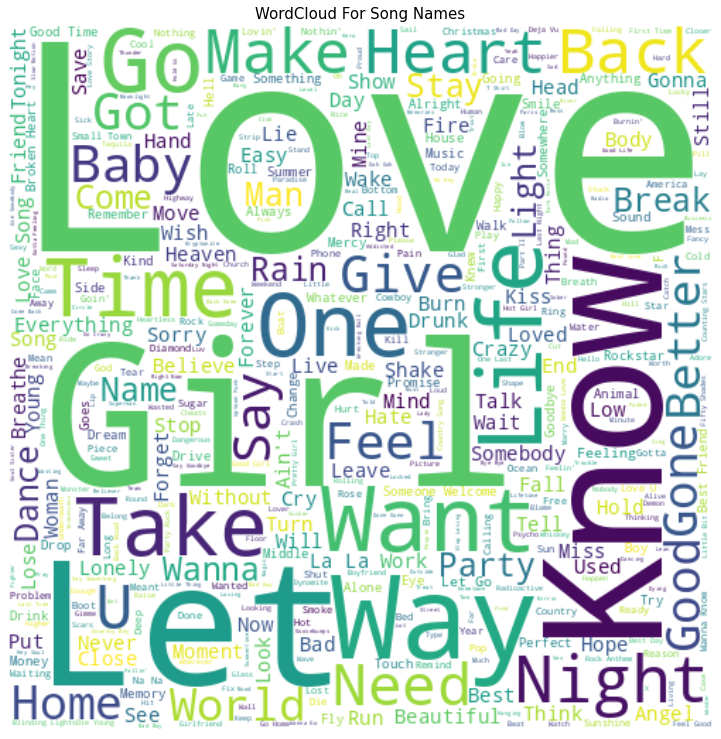

In [16]:
from wordcloud import STOPWORDS
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(song_names)
plt.figure(figsize=(13,13))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud For Song Names", fontsize=15)
plt.show()

We generate wordCloud for song names in a lovely heart shape

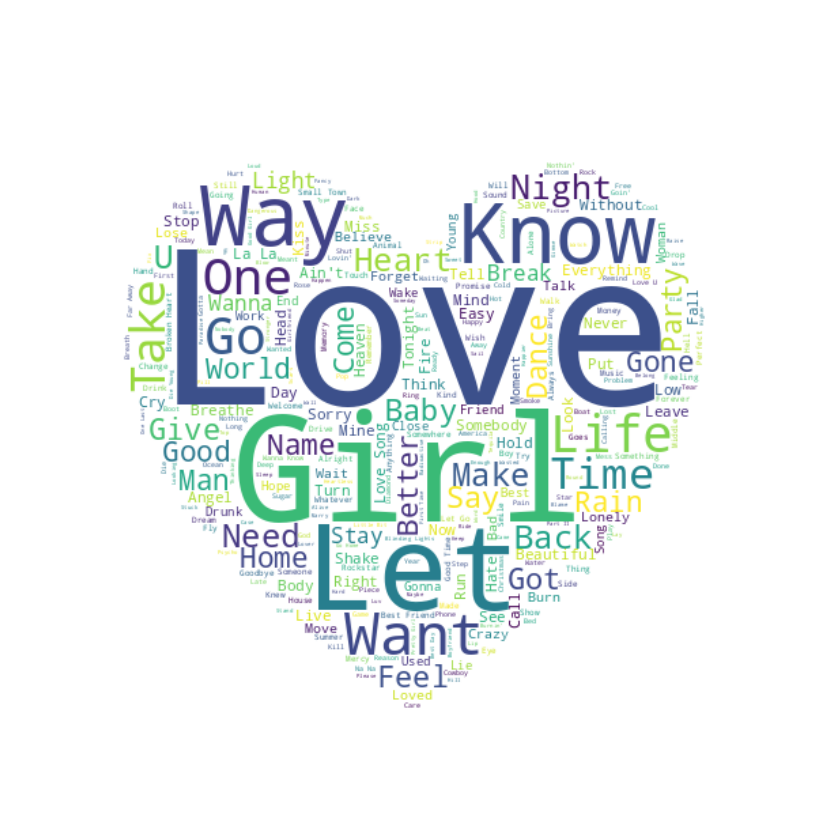

In [17]:
mask = np.array(Image.open('heart.jpeg'))
wc = WordCloud(stopwords=STOPWORDS,
               mask=~mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(song_names)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
# plt.title("WordCloud For Song Names", fontsize=15)
plt.show()